# MATH 4042 Mathematics 3rd Year Project

## Computer simulator of repressilator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(0,0,0,p1_0,p2_0,p3_0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,p1,'b',label='$p_1$')
    plt.plot(t,p2,'g',label='$p_2$')
    plt.plot(t,p3,'k',label='$p_3$')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,p1_0=(0,30,0.01),p2_0=(0,30,0.01),p3_0=(0,30,0.01),n=(1,100,0.1),alpha_0=(0,10,0.01),alpha_1=(0.1,100,0.1),beta=(0,100,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='p1_0', max=30.0, step=0.01), FloatSlider(value=15.0…

## Effect of Hill coefficient

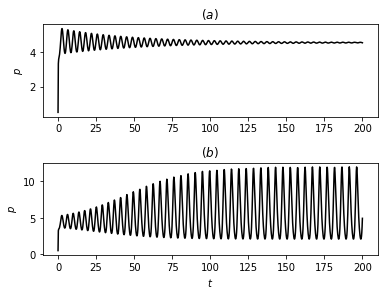

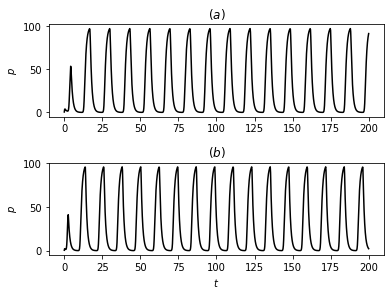

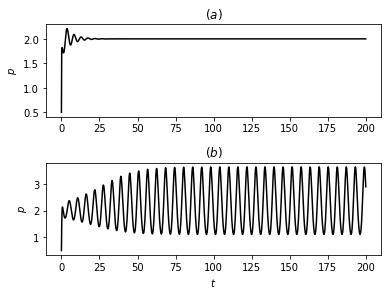

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1.5,1.0,1.3,p1_0,p2_0,p3_0)
    t = np.linspace(0,200,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    return p1

    
#higher repression alpha=100
t = np.linspace(0,200,1000)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(t, f(0.5,0.5,0.5,2,0,100,100),'k')
ax1.set_ylabel(r'$p$')
ax1.title.set_text(r'$(a)$')
ax2.plot(t, f(0.5,0.5,0.5,2.1,0,100,100),'k')
ax2.set_ylabel(r'$p$')
ax2.set_xlabel(r'$t$')
ax2.title.set_text(r'$(b)$')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig('Oscillationplot1.pdf',dpi=1000)

#increasing hill coefficient, removing any limitation on beta for sufficiently large alpha, try beta=5, 50,when n=5
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(t, f(0.5,0.5,0.5,5,0,100,5),'k')
ax1.set_ylabel(r'$p$')
ax1.title.set_text(r'$(a)$')
ax2.plot(t, f(0.5,0.5,0.5,5,0,100,50),'k')
ax2.set_ylabel(r'$p$')
ax2.set_xlabel(r'$t$')
ax2.title.set_text(r'$(b)$')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig('Oscillationplot2.pdf',dpi=1000)
#lower repression
#when hill coefficient is lower, with lower repression, for large value of beta, it might lie in stable region
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(t, f(0.5,0.5,0.5,2,0,10,100),'k')
ax1.set_ylabel(r'$p$')
ax1.title.set_text(r'$(a)$')
ax2.plot(t, f(0.5,0.5,0.5,2,0,10,5),'k')
ax2.set_ylabel(r'$p$')
ax2.set_xlabel(r'$t$')
ax2.title.set_text(r'$(b)$')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig('Oscillationplot3.pdf',dpi=1000)

Initial condition $m_1(0)=1,5, m_2(0)=1.0, m_3(0)=1.3$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1.5,1.0,1.3,p1_0,p2_0,p3_0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,m1,'b',label='$m_1$')
    plt.plot(t,m2,'g',label='$m_2$')
    #plt.plot(t,m3,'k',label='$m_3$')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,p1_0=(0,30,0.01),p2_0=(0,30,0.01),p3_0=(0,30,0.01),n=(1,100,0.1),alpha_0=(0,10,0.01),alpha_1=(0.1,100,0.1),beta=(0,100,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='p1_0', max=30.0, step=0.01), FloatSlider(value=15.0…

## Uniqueness of Fixed Point


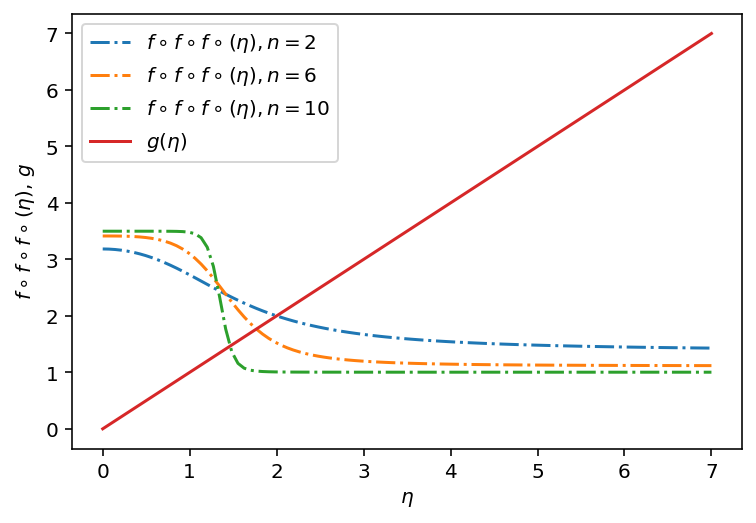

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
alpha_0 = 1
alpha_1 = 5
f1 = lambda t: alpha_0 + alpha_1 / (1 + t ** 2)
f2 = lambda t: alpha_0 + alpha_1 / (1+ t ** 3)
f3 = lambda t: alpha_0 + alpha_1 / (1+ t ** 6)
t = np.linspace(0,7,100)
y_1 = f1(f1(f1(t)))
y_2 = f2(f2(f2(t)))
y_3 = f3(f3(f3(t)))
g = t

plt.plot(t,y_1,linestyle='-.',label='$f \circ f \circ f \circ (\eta),n=2$')
plt.plot(t,y_2,linestyle='-.',label='$f \circ f \circ f \circ (\eta),n=6$')
plt.plot(t,y_3,linestyle='-.',label='$f \circ f \circ f \circ (\eta),n=10$')
plt.plot(t,g,label='$g(\eta)$')
plt.xlabel('$\eta$')
plt.ylabel('$f \circ f \circ f \circ (\eta)$, $g$')
plt.legend(loc='best')
plt.savefig('Fixedpoint.pdf',dpi=1000)

## Hill function

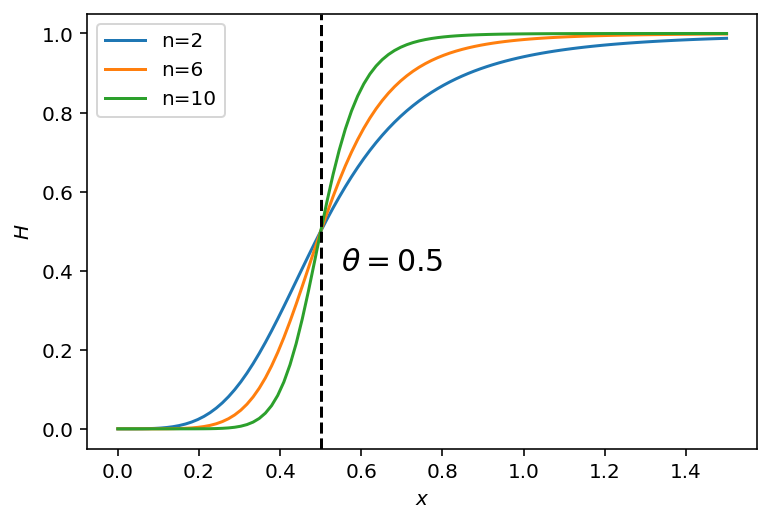

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,n,theta):
    return x**n/(theta**n+x**n)

def f_bar(x,n,theta):
    return theta**n/(theta**n+x**n)


x = np.linspace(0,1.5,100)

plt.plot(x,f(x,4,0.5),label='n=2')
plt.plot(x,f(x,6,0.5),label='n=6')
plt.plot(x,f(x,10,0.5),label='n=10')
plt.axvline(0.5,color='k', linestyle='--')
plt.text(0.55, 0.4, r"$\theta=0.5$", fontsize = 15)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$H$')
plt.savefig('Hillfunction.pdf',dpi=1000)

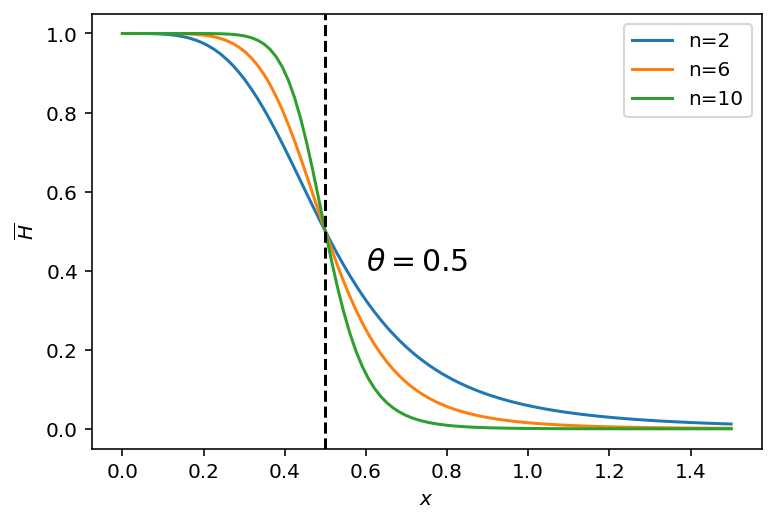

In [21]:
plt.plot(x,f_bar(x,4,0.5),label='n=2')
plt.plot(x,f_bar(x,6,0.5),label='n=6')
plt.plot(x,f_bar(x,10,0.5),label='n=10')
plt.axvline(0.5,color='k', linestyle='--')
plt.text(0.6, 0.4, r"$\theta=0.5$", fontsize = 15)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$\overline{H}$')
plt.savefig('Hillfunction_bar.pdf',dpi=1000)

## Numerical method for finding $\alpha_{bif}=r_0^{n+1}+r_0$

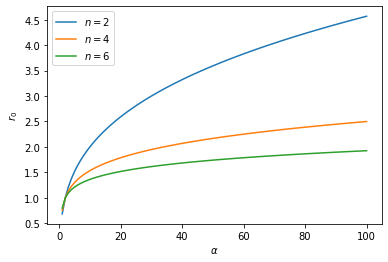

In [2]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


def func_root(r_0,alpha,n):
    return alpha-r_0 ** (n+1)-r_0

alpha=np.linspace(1,100,100)
sol1=np.zeros(len(alpha))

for i in range(0,100):
    sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2))

sol2=np.zeros(len(alpha))
for i in range(0,100):
    sol2[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],4))

sol3=np.zeros(len(alpha))
for i in range(0,100):
    sol3[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],6))


plt.plot(alpha,sol1,label='$n=2$')
plt.plot(alpha,sol2,label='$n=4$')
plt.plot(alpha,sol3,label='$n=6$')
plt.xlabel(r'$\alpha$')
plt.ylabel('$r_0$')
plt.legend(loc='best')
plt.savefig('Bisectionmethod.pdf',dpi=1000)

$$\alpha=(R^n+1)(R-\alpha_0)$$

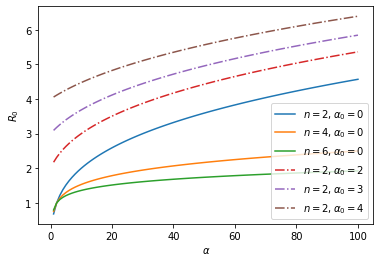

In [6]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


def func_root(R_0,alpha,n,alpha_0):
    return alpha-(R_0**n+1)*(R_0-alpha_0)

alpha=np.linspace(1,100,100)
sol1=np.zeros(len(alpha))

for i in range(0,100):
    sol1[i]= optimize.bisect(func_root,0,alpha[i]+2,args=(alpha[i],2,2))

sol2=np.zeros(len(alpha))
for i in range(0,100):
    sol2[i]= optimize.bisect(func_root,0,alpha[i]+3,args=(alpha[i],2,3))

sol3=np.zeros(len(alpha))
for i in range(0,100):
    sol3[i]= optimize.bisect(func_root,0,alpha[i]+4,args=(alpha[i],2,4))

    
sol4=np.zeros(len(alpha))    
for i in range(0,100):
    sol4[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))

sol5=np.zeros(len(alpha))
for i in range(0,100):
    sol5[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],4,0))

sol6=np.zeros(len(alpha))
for i in range(0,100):
    sol6[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],6,0))
    


plt.plot(alpha,sol4,label=r'$n=2,\alpha_0=0$')
plt.plot(alpha,sol5,label=r'$n=4,\alpha_0=0$')
plt.plot(alpha,sol6,label=r'$n=6,\alpha_0=0$')

plt.plot(alpha,sol1,'-.',label=r'$n=2,\alpha_0=2$')
plt.plot(alpha,sol2,'-.',label=r'$n=2,\alpha_0=3$')
plt.plot(alpha,sol3,'-.',label=r'$n=2,\alpha_0=4$')


#plt.plot(alpha,sol4,label='$n=2,\alpha_0=2$')
plt.xlabel(r'$\alpha$')
plt.ylabel('$R_0$')
plt.legend(loc='best')
plt.savefig('Bisectionmethod2.pdf',dpi=1000)

## Parameter space $\alpha=\frac{n}{2}\left(\frac{n}{2}-1\right)^{-\frac{n+1}{n}}$

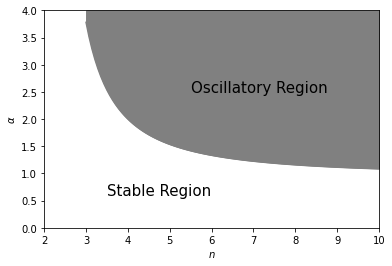

In [7]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


def func(n):
    return (n / 2) * (n / 2 - 1) ** (-(n+1) / n)


    
n=np.linspace(3,10,100)
sol=func(n)
plt.plot(n,sol,'grey')
plt.xlabel('$n$')
plt.ylabel(r'$\alpha$')
plt.xlim([2,10])
plt.ylim([0,4])
plt.fill_between(n,sol, 4, color='grey')
plt.text(5.5, 2.5, "Oscillatory Region", fontsize = 15)
plt.text(3.5, 0.6, "Stable Region", fontsize = 15)
plt.savefig('OscillatoryRegionplot.pdf',dpi=1000)



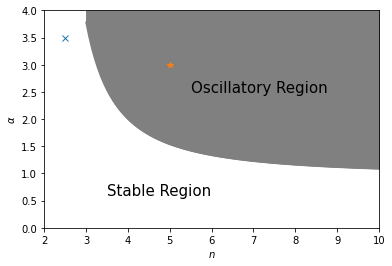

In [277]:
plt.plot(n,sol,'grey')
plt.xlabel('$n$')
plt.ylabel(r'$\alpha$')
plt.xlim([2,10])
plt.ylim([0,4])
plt.fill_between(n,sol, 4, color='grey')
plt.text(5.5, 2.5, "Oscillatory Region", fontsize = 15)
plt.text(3.5, 0.6, "Stable Region", fontsize = 15)
plt.plot(2.5,3.5,marker='x')
plt.plot(5,3,marker='*')
plt.savefig('OscillatoryRegionplot_Marker.pdf',dpi=1000)

$$\frac{(\beta+1)^2}{\beta}=\frac{3\Gamma^2}{4+2\Gamma}$$

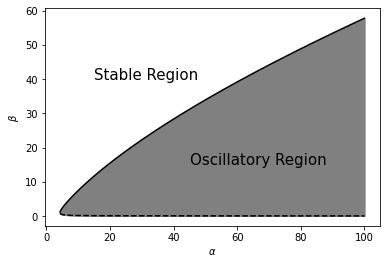

In [8]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

def func_root(R_0,alpha,n,alpha_0):
    return alpha-(R_0**n+1)*(R_0-alpha_0)


alpha=np.linspace(1,100,2000)
#Plot the parameter space
def bifurcation1(n,alpha):
    sol1=np.zeros(len(alpha))    
    for i in range(len(alpha)):
        sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))
        
    beta=np.zeros(len(alpha))
    Gamma = np.zeros(len(alpha))
    for i in range(len(alpha)):
        R_0=sol1
        Gamma=-(alpha[i]*n*R_0[i]**(n-1))/(1+R_0[i]**n)**2
        S=9*Gamma**2-24*Gamma-48
        if S < 0:
            beta[i]=np.nan
        else:
            beta[i]=(3*Gamma**2-4*Gamma-8)/(4*Gamma+8)+Gamma*(np.sqrt(S)/(4*Gamma+8))
    return beta

def bifurcation2(n,alpha):
    sol1=np.zeros(len(alpha))    
    for i in range(len(alpha)):
        sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))
    beta=np.zeros(len(alpha))
    Gamma = np.zeros(len(alpha))
    for i in range(len(alpha)):
        R_0=sol1
        Gamma=-(alpha[i]*n*R_0[i]**(n-1))/(1+R_0[i]**n)**2
        S=9*Gamma**2-24*Gamma-48
        if S < 0:
            beta[i]=np.nan
        else:
            beta[i]=(3*Gamma**2-4*Gamma-8)/(4*Gamma+8)-Gamma*(np.sqrt(S)/(4*Gamma+8))
    return beta

n=2
plt.plot(alpha,bifurcation1(n,alpha),'k--')
plt.plot(alpha,bifurcation2(n,alpha),'k')
plt.fill_between(alpha,bifurcation2(n,alpha),bifurcation1(n,alpha), color='grey')
plt.fill_between(alpha,bifurcation2(n,alpha),bifurcation1(n,alpha), color='grey')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.text(45, 15, "Oscillatory Region", fontsize = 15)
plt.text(15, 40, "Stable Region", fontsize = 15)
plt.savefig('OscillatoryRegionplot2.pdf',dpi=1000)

## Reduced model plot for protein

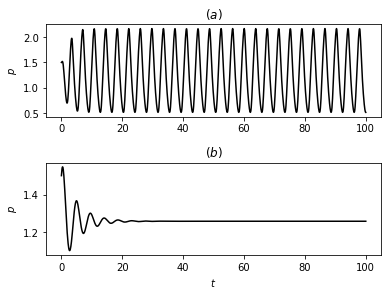

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha):
    x, y, z = S
    return [alpha/(1+y**n)-x, alpha/(1+z**n)-y, alpha/(1+x**n)-z]

def f(x,y,z,n,alpha):
    S_0=(1.5,1.0,1.3)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x = sol.T[0]
    y = sol.T[1]
    z = sol.T[2]
    return x
    
t = np.linspace(0,100,1000)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(t, f(0.5,0.5,0.5,5,3),'k')
ax1.set_ylabel(r'$p$')
ax1.title.set_text(r'$(a)$')
ax2.plot(t,f(0.5,0.5,0.5,2.5,3.5),'k')
ax2.set_ylabel(r'$p$')
ax2.set_xlabel(r'$t$')
ax2.title.set_text(r'$(b)$')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig('Oscillationplot_reduced_1.pdf',dpi=1000)


## Extension of reduced model

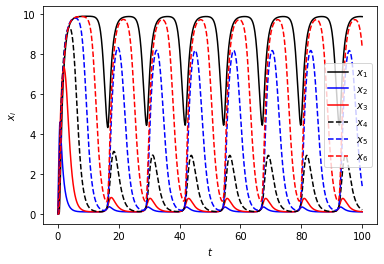

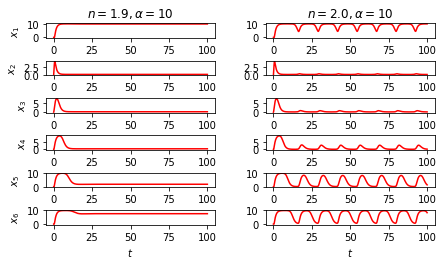

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha):
    x1, x2, x3, x4, x5, x6 = S
    return [alpha*x6**n/(1+x6**n)-x1, alpha/(1+x1**n)-x2, alpha*x2**n/(1+x2**n)-x3, alpha*x3**n/(1+x3**n)-x4, alpha*x4**n/(1+x4**n)-x5, alpha*x5**n/(1+x5**n)-x6]

def pattern(n,alpha):
    S_0=(0,0,0,0,0,0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x1 = sol.T[0] 
    x2 = sol.T[1] 
    x3 = sol.T[2] 
    x4 = sol.T[3] 
    x5 = sol.T[4]
    x6 = sol.T[5]
    return x1, x2, x3, x4, x5, x6


t = np.linspace(0,100,1000)
plt.plot(t,pattern(2,10)[0],'k',label=r'$x_1$')
plt.plot(t,pattern(2,10)[1],'b',label=r'$x_2$')
plt.plot(t,pattern(2,10)[2],'r',label=r'$x_3$')
plt.plot(t,pattern(2,10)[3],'k--',label=r'$x_4$')
plt.plot(t,pattern(2,10)[4],'b--',label=r'$x_5$')
plt.plot(t,pattern(2,10)[5],'r--',label=r'$x_6$')
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$x_i$')
plt.savefig('general_plot.pdf',dpi=1000)
fig, axs = plt.subplots(6, 2)
axs[0,0].plot(t, pattern(1.9,10)[0],'r')
axs[0,0].title.set_text(r'$n=1.9,\alpha=10$')
axs[0,0].set_ylabel(r'$x_1$')
axs[0,1].plot(t, pattern(2.0,10)[0],'r')
axs[0,1].title.set_text(r'$n=2.0,\alpha=10$')
axs[1,0].plot(t, pattern(1.9,10)[1],'r')
axs[1,0].set_ylabel(r'$x_2$')
axs[1,1].plot(t, pattern(2.0,10)[1],'r')
axs[2,0].plot(t, pattern(1.9,10)[2],'r')
axs[2,0].set_ylabel(r'$x_3$')
axs[2,1].plot(t, pattern(2.0,10)[2],'r')
axs[3,0].plot(t, pattern(1.9,10)[3],'r')
axs[3,0].set_ylabel(r'$x_4$')
axs[3,1].plot(t, pattern(2.0,10)[3],'r')
axs[4,0].plot(t, pattern(1.9,10)[4],'r')
axs[4,0].set_ylabel(r'$x_5$')
axs[4,1].plot(t, pattern(2.0,10)[4],'r')
axs[5,0].plot(t, pattern(1.9,10)[5],'r')
axs[5,0].set_xlabel(r'$t$')
axs[5,0].set_ylabel(r'$x_6$')
axs[5,1].plot(t, pattern(2.0,10)[5],'r')
axs[5,1].set_xlabel(r'$t$')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.0, 
                    top=0.8, 
                    wspace=0.3, 
                    hspace=1.5)
plt.savefig('threshold_pattern.pdf',dpi=1000)


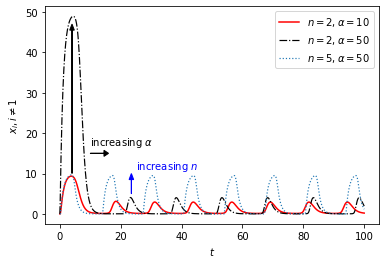

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha):
    x1, x2, x3, x4, x5, x6 = S
    return [alpha*x6**n/(1+x6**n)-x1, alpha/(1+x1**n)-x2, alpha*x2**n/(1+x2**n)-x3, alpha*x3**n/(1+x3**n)-x4, alpha*x4**n/(1+x4**n)-x5, alpha*x5**n/(1+x5**n)-x6]

def pattern(n,alpha):
    S_0=(0,0,0,0,0,0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x1 = sol.T[0] 
    x2 = sol.T[1] 
    x3 = sol.T[2] 
    x4 = sol.T[3] 
    x5 = sol.T[4]
    x6 = sol.T[5]
    return x1, x2, x3, x4, x5, x6

t = np.linspace(0,100,1000)
plt.plot(t,pattern(2,10)[3],'r',linewidth=1.5,label=r'$n=2,\alpha=10$')
#plt.plot(t,pattern(5,10)[3],'b-.',linewidth=1.2,label=r'$n=5,\alpha=10$')
plt.plot(t,pattern(2,50)[3],'k-.',linewidth=1.2,label=r'$n=2,\alpha=50$')
plt.plot(t,pattern(5,10)[3],':',linewidth=1.2,label=r'$n=5,\alpha=50$')
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$x_i, i\neq1$')
plt.arrow(10, 15, 6, 0, color='k',
          head_length = 1.5, head_width = 1.5, 
          length_includes_head = True)
plt.arrow(23.5, 5, 0, 5, color='b',
          head_length = 1.5, head_width = 1.5, 
          length_includes_head = True)
plt.arrow(4, 10, 0, 37, color='k',
          head_length = 1.5, head_width = 1.5, 
          length_includes_head = True)
plt.text(10, 17, r"increasing $\alpha$", fontsize = 10)
plt.text(25, 11, r"increasing $n$", fontsize = 10,color='b')
plt.savefig('oscillatory_pattern.pdf',dpi=1000)

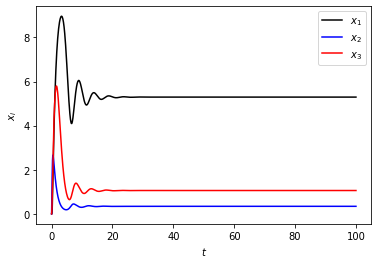

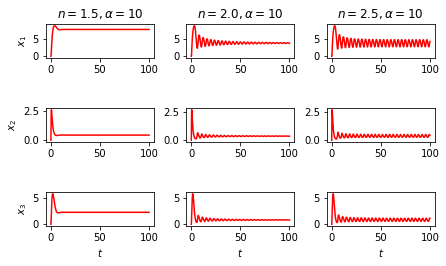

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha):
    x1, x2, x3= S
    return [alpha*x3**n/(1+x3**n)-x1, alpha/(1+x1**n)-x2, alpha*x2**n/(1+x2**n)-x3]

def pattern(n,alpha):
    S_0=(0,0,0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x1 = sol.T[0] 
    x2 = sol.T[1] 
    x3 = sol.T[2] 
    return x1, x2, x3


t = np.linspace(0,100,1000)
plt.plot(t,pattern(2,10)[0],'k',label=r'$x_1$')
plt.plot(t,pattern(2,10)[1],'b',label=r'$x_2$')
plt.plot(t,pattern(2,10)[2],'r',label=r'$x_3$')
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$x_i$')
plt.savefig('general_plot3.pdf',dpi=1000)

fig, axs = plt.subplots(3, 3)
axs[0,0].plot(t, pattern(1.5,10)[0],'r')
axs[0,0].title.set_text(r'$n=1.5,\alpha=10$')
axs[0,0].set_ylabel(r'$x_1$')
axs[0,1].plot(t, pattern(2.4,10)[0],'r')
axs[0,1].title.set_text(r'$n=2.0,\alpha=10$')
axs[0,2].plot(t,pattern(2.5,10)[0],'r')
axs[0,2].title.set_text(r'$n=2.5,\alpha=10$')
axs[1,0].plot(t, pattern(1.5,10)[1],'r')
axs[1,0].set_ylabel(r'$x_2$')
axs[1,1].plot(t, pattern(2.4,10)[1],'r')
axs[1,2].plot(t,pattern(2.5,10)[1],'r')
axs[2,0].plot(t, pattern(1.5,10)[2],'r')
axs[2,0].set_ylabel(r'$x_3$')
axs[2,0].set_xlabel(r'$t$')
axs[2,1].plot(t, pattern(2.4,10)[2],'r')
axs[2,1].set_xlabel(r'$t$')
axs[2,2].plot(t,pattern(2.5,10)[2],'r')
axs[2,2].set_xlabel(r'$t$')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.0, 
                    top=0.8, 
                    wspace=0.3, 
                    hspace=1.5)
plt.savefig('threshold_pattern3.pdf',dpi=1000)

## Synchronization properties of repressilator

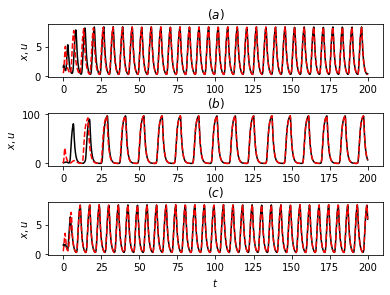

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha,d):
    x, y, z, u, v, w = S
    return [alpha/(1+y**n)-x+d*(u-x), alpha/(1+z**n)-y,alpha/(1+x**n)-z,alpha/(1+w**n)-u+d*(x-u), alpha/(1+u**n)-v, alpha/(1+v**n)-w]

def plot_solution(n,alpha,d):
    S_0=(1.5,1.0,1.3,0.5,1.0,1.3)
    t = np.linspace(0,200,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha,d))
    x = sol.T[0] 
    y = sol.T[1] 
    z = sol.T[2]
    u = sol.T[3] 
    v = sol.T[4] 
    w = sol.T[5]
    return x,u
  

    
t = np.linspace(0,200,1000)
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t, plot_solution(5,10,0.1)[0],'k')
ax1.plot(t, plot_solution(5,10,0.1)[1],'r--')
ax1.set_ylabel(r'$x,u$')
ax1.title.set_text(r'$(a)$')
ax2.plot(t, plot_solution(5,100,0.1)[0],'k')
ax2.plot(t, plot_solution(5,100,0.1)[1],'r--')
ax2.set_ylabel(r'$x,u$')
ax2.title.set_text(r'$(b)$')
ax3.plot(t, plot_solution(5,10,1)[0],'k')
ax3.plot(t, plot_solution(5,10,1)[1],'r--')
ax3.set_ylabel(r'$x,u$')
ax3.set_xlabel(r'$t$')
ax3.title.set_text(r'$(c)$')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.7)
plt.savefig('Diffusion_effect.pdf',dpi=1000)

## Phase plane analysis

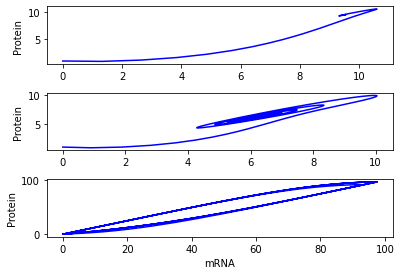

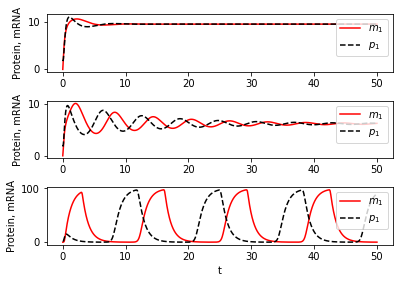

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def phase_plot(S_0,n,alpha_0,alpha_1,beta):
    #S_0=(1.5,1.0,1.3,0.5,0.5,0.5)
    t = np.linspace(0,50,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    
    return m1,m2,m3,p1,p2,p3

t = np.linspace(0,50,1000)
fig, axs = plt.subplots(3, 1)
S_0=(0,0,0,1,2,3)
axs[0].plot(phase_plot(S_0,1,0,100,5)[0],phase_plot(S_0,1,0,100,5)[3],'b-')
axs[0].set_ylabel('Protein')
axs[1].plot(phase_plot(S_0,1.5,0,100,5)[0],phase_plot(S_0,1.5,0,100,5)[3],'b-')
axs[1].set_ylabel('Protein')
axs[2].plot(phase_plot(S_0,5,0,100,5)[0],phase_plot(S_0,5,0,100,5)[3],'b-')
axs[2].set_ylabel('Protein')
axs[2].set_xlabel('mRNA')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)
plt.savefig('Phase_plot_Hopf.pdf',dpi=500)

fig, axs = plt.subplots(3, 1)
axs[0].plot(t,phase_plot(S_0,1,0,100,5)[0],'r-',label=r'$m_1$')
#axs[0].plot(t,phase_plot(S_0,1,0,100,5)[3],'--')
#axs[0].plot(t,phase_plot(S_0,1,0,100,5)[1],'-')
axs[0].plot(t,phase_plot(S_0,1,0,100,5)[4],'k--',label=r'$p_1$')
#axs[0].plot(t,phase_plot(S_0,1,0,100,5)[2],'-')
#axs[0].plot(t,phase_plot(S_0,1,0,100,5)[5],'--')
axs[0].set_ylabel('Protein, mRNA')
axs[0].legend(loc='upper right')
axs[1].plot(t,phase_plot(S_0,1.5,0,100,5)[0],'r-',label=r'$m_1$')
#axs[1].plot(t,phase_plot(S_0,1.5,0,100,5)[3],'--')
#axs[1].plot(t,phase_plot(S_0,1.5,0,100,5)[1],'-')
axs[1].plot(t,phase_plot(S_0,1.5,0,100,5)[4],'k--',label=r'$p_1$')
#axs[1].plot(t,phase_plot(S_0,1.5,0,100,5)[2],'-')
#axs[1].plot(t,phase_plot(S_0,1.5,0,100,5)[5],'--')
axs[1].set_ylabel('Protein, mRNA')
axs[1].legend(loc='upper right')
axs[2].plot(t,phase_plot(S_0,5,0,100,5)[0],'r-', label=r'$m_1$')
#axs[2].plot(t,phase_plot(S_0,5,0,100,5)[3],'--')
#axs[2].plot(t,phase_plot(S_0,5,0,100,5)[1],'-')
axs[2].plot(t,phase_plot(S_0,5,0,100,5)[4],'k--',label=r'$p_1$')
#axs[2].plot(t,phase_plot(S_0,5,0,100,5)[2],'-')
#axs[2].plot(t,phase_plot(S_0,5,0,100,5)[5],'--')
axs[2].set_xlabel('t')
axs[2].set_ylabel('Protein, mRNA')
axs[2].legend(loc='upper right')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)
plt.savefig('Phase_plot_Oscillation.pdf',dpi=500)


import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)

radius = 1

a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, axes = plt.subplots(1)

axes.plot(a, b,'r')
axes.plot(1/2,sqrt(3)/2,'bo')
axes.plot(1/2,-sqrt(3)/2,'bo')
axes.plot(-1,0,'bo')
axes.set_xlabel('Re')
axes.set_ylabel('Im')
axes.set_aspect(1)
plt.show()

## Bifurcation diagram

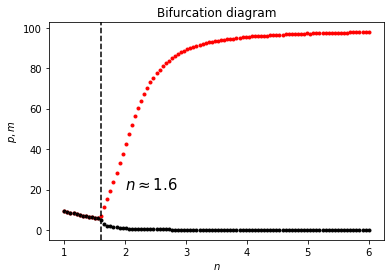

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(n,alpha_0,alpha_1,beta):
    S_0=(0,0,0,1,2,3)
    t = np.linspace(0,140,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    return p1,p2,p3,m1,m2,m3



n=np.linspace(1,6,100)
for i in range(len(n)):
    p1=f(n[i],0,100,5)[0][-100:]
    plt.plot(n[i],np.amax(p1),'r.')
    plt.plot(n[i],np.amin(p1),'k.')


plt.axvline(1.6,color='k', linestyle='--')
plt.text(2, 20, r"$n \approx 1.6$", fontsize = 15)
plt.xlabel(r'$n$')
plt.ylabel(r'$p,m$')
plt.title('Bifurcation diagram')
plt.show()
#plt.savefig('Bifurcation diagram_1.pdf',dpi=500)




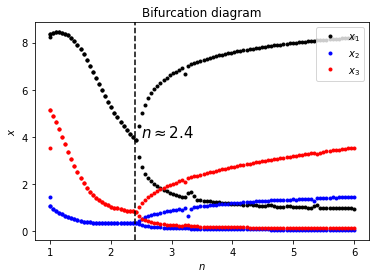

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha):
    x1, x2, x3= S
    return [alpha*x3**n/(1+x3**n)-x1, alpha/(1+x1**n)-x2, alpha*x2**n/(1+x2**n)-x3]

def pattern(n,alpha):
    S_0=(0,0,0)
    t = np.linspace(0,1000,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x1 = sol.T[0] 
    x2 = sol.T[1] 
    x3 = sol.T[2] 
    return x1, x2, x3


n=np.linspace(1,6,100)
for i in range(len(n)):
    x1=pattern(n[i],10)[0][-100:]
    x2=pattern(n[i],10)[1][-100:]
    x3=pattern(n[i],10)[2][-100:]
    plt.plot(n[i],np.amax(x1),'k.')
    plt.plot(n[i],np.amin(x1),'k.')
    plt.plot(n[i],np.amax(x2),'b.')
    plt.plot(n[i],np.amin(x2),'b.')
    plt.plot(n[i],np.amax(x3),'r.')
    plt.plot(n[i],np.amin(x3),'r.')

plt.axvline(2.4,color='k', linestyle='--')
plt.text(2.5, 4, r"$n \approx 2.4$", fontsize = 15)
plt.xlabel(r'$n$')
plt.ylabel(r'$x$')
plt.title('Bifurcation diagram')

#for labeling
plt.plot(n[0],np.amax(x1),'k.',label=r'$x_1$')
plt.plot(n[0],np.amax(x2),'b.',label=r'$x_2$')
plt.plot(n[0],np.amax(x3),'r.',label=r'$x_3$')
plt.legend(loc='upper right')
plt.show()  


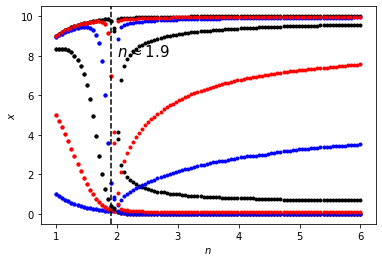

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha):
    x1, x2, x3, x4, x5, x6 = S
    return [alpha*x6**n/(1+x6**n)-x1, alpha/(1+x1**n)-x2, alpha*x2**n/(1+x2**n)-x3, alpha*x3**n/(1+x3**n)-x4, alpha*x4**n/(1+x4**n)-x5, alpha*x5**n/(1+x5**n)-x6]

def pattern(n,alpha):
    S_0=(0,0,0,0,0,0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x1 = sol.T[0] 
    x2 = sol.T[1] 
    x3 = sol.T[2] 
    x4 = sol.T[3] 
    x5 = sol.T[4]
    x6 = sol.T[5]
    return x1, x2, x3, x4, x5, x6


n=np.linspace(1,6,100)
for i in range(len(n)):
    x1=pattern(n[i],10)[0][-100:]
    x2=pattern(n[i],10)[1][-100:]
    x3=pattern(n[i],10)[2][-100:]
    x4=pattern(n[i],10)[3][-100:]
    x5=pattern(n[i],10)[4][-100:]
    x6=pattern(n[i],10)[5][-100:]
    plt.plot(n[i],np.amax(x1),'k.')
    plt.plot(n[i],np.amin(x1),'k.')
    plt.plot(n[i],np.amax(x2),'b.')
    plt.plot(n[i],np.amin(x2),'b.')
    plt.plot(n[i],np.amax(x3),'r.')
    plt.plot(n[i],np.amin(x3),'r.')
    plt.plot(n[i],np.amax(x4),'k.')
    plt.plot(n[i],np.amin(x4),'k.')
    plt.plot(n[i],np.amax(x5),'b.')
    plt.plot(n[i],np.amin(x5),'b.')
    plt.plot(n[i],np.amax(x6),'r.')
    plt.plot(n[i],np.amin(x6),'r.')


plt.axvline(1.9,color='k', linestyle='--')
plt.text(2.0, 8, r"$n \approx 1.9$", fontsize = 15)
plt.xlabel(r'$n$')
plt.ylabel(r'$x$')
plt.show()    